<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%207/Task%201/Colab%20Notebook/Week_7_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Automobile.csv menggunakan bagging dan boosting

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Dataset
url = 'https://raw.githubusercontent.com/raflinoob132/MachineLearning-1/refs/heads/main/Week%201/Automobile/Automobile.csv'
df = pd.read_csv(url)

# Target dan fitur
X = df.drop('symboling', axis=1)
y = df['symboling']

# Definisikan fitur numerik dan kategorik
numerical_features = ['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio',
                      'stroke', 'bore', 'engine-size', 'num-of-cylinders', 'curb-weight', 'height', 'width',
                      'length', 'wheel-base', 'normalized-losses']
categorical_features = ['fuel-system', 'engine-type', 'engine-location', 'drive-wheels', 'body-style',
                        'num-of-doors', 'aspiration', 'fuel-type', 'make']

# Preprocessing
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===================== Bagging =====================
bagging_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(n_estimators=100, random_state=42))
])
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# ===================== Boosting =====================
boosting_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

# ===================== Evaluasi =====================
def evaluate(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"=== {name} ===")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}\n")

evaluate(y_test, y_pred_bagging, "Bagging")
evaluate(y_test, y_pred_boosting, "Boosting")


=== Bagging ===
MSE: 0.24
RMSE: 0.49
R-squared: 0.83

=== Boosting ===
MSE: 0.31
RMSE: 0.56
R-squared: 0.79



2. Bouston Housing menggunakan Boosting

=== Evaluasi Boosting ===
MSE (Mean Squared Error): 6.208861361528038
RMSE (Root Mean Squared Error): 2.491758688462436
R² (R-squared): 0.9153342280466539


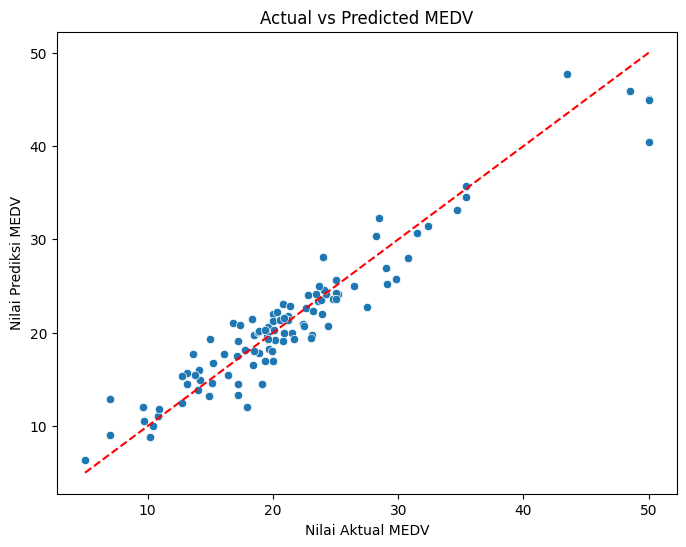

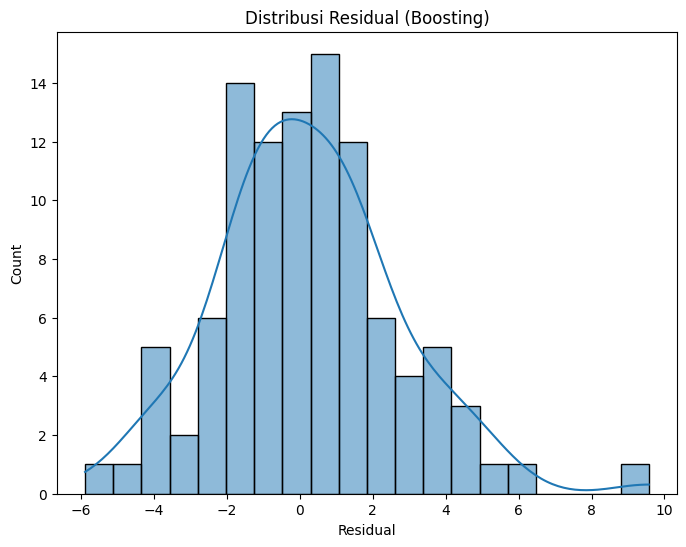

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Transformasi untuk fitur skewed
df['crim_log'] = np.log1p(df['crim'])
df['zn_log'] = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun binary, tetap bisa karena skewed
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Ganti fitur asli dengan versi transformasi
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn'] = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b'] = df_model['b_yj']

# Buang kolom transformasi tambahan
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==================== MODEL BOOSTING ====================
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# ==================== EVALUASI ====================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Boosting ===")
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² (R-squared):", r2)

# ==================== VISUALISASI ====================
# Scatter plot aktual vs prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual (Boosting)")
plt.show()


3. Infrared menggunakan bagging

Missing values per column:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64

Bagging Regressor Evaluation:
MSE: 0.0587
RMSE: 0.2422
R-Squared: 0.7215


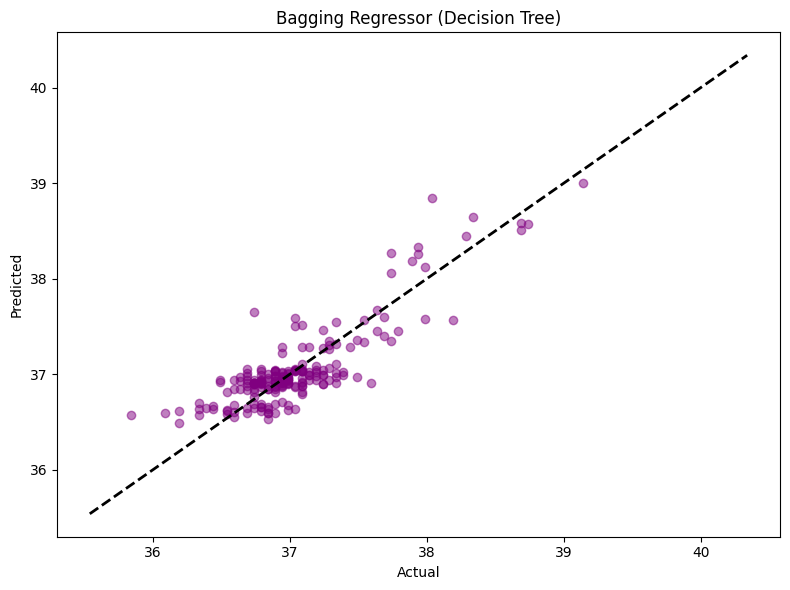

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Muat dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv"
data = pd.read_csv(url)

# Periksa missing values
print("Missing values per column:")
print(data.isna().sum())

# Pisahkan fitur dan target
X = data.drop('aveOralM', axis=1)
y = data['aveOralM']

# Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline Bagging dengan Decision Tree sebagai base estimator
bagging_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=5), # Change 'base_estimator' to 'estimator'
        n_estimators=10,
        random_state=42))
])

# Latih model Bagging
bagging_pipeline.fit(X_train, y_train)

# Prediksi dengan model Bagging
y_pred_bagging = bagging_pipeline.predict(X_test)

# Evaluasi Bagging
mse_bag = mean_squared_error(y_test, y_pred_bagging)
rmse_bag = np.sqrt(mse_bag)
r2_bag = r2_score(y_test, y_pred_bagging)

print("\nBagging Regressor Evaluation:")
print(f"MSE: {mse_bag:.4f}")
print(f"RMSE: {rmse_bag:.4f}")
print(f"R-Squared: {r2_bag:.4f}")

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bagging, alpha=0.5, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Bagging Regressor (Decision Tree)')
plt.tight_layout()
plt.show()
